<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/homeworke/37_Dz_Pro_%D0%9F%D0%B5%D1%80%D0%B5%D0%BD%D0%BE%D1%81_%D1%81%D1%82%D0%B8%D0%BB%D1%8F_%D1%80%D0%B5%D1%87%D0%B8_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Возьмите за основу консультанта компании [POSTOPLAN](https://docs.google.com/document/d/1rihIt6rnBHfrv42C1ALtpoHoS2jIVseCg49aWqsOyk4), автоматизированной платформы маркетинга в соцсетях и мессенджерах, созданной нами на уроке ``"Создание диалога с chatGPT. Соединение нескольких chatGPT моделей"``, добавьте консультанту генерацию аудио файла из ответа модели GPT.



*  Для Синтеза речи можно использовать любую нейронную сеть с подбором параметов.

    *  Обратите внимание, что каждый сервис ставит ограничение на бесплатную генерацию аудиоконтента, поэтому рекомендуем в промте дать указание модели отвечать в одно предложение.

In [ ]:
# Ваше решение

In [ ]:
!pip install openai
!pip install gtts

In [ ]:
!pip install faiss-cpu langchain==0.0.271 openai==0.28.1 tiktoken

In [ ]:
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [ ]:
# импортируем необходимые библиотеки
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import MarkdownHeaderTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from gtts import gTTS
from IPython.display import Audio
from getpass import getpass
import os
import getpass
import re
import requests
import openai
import tiktoken
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
import threading

In [ ]:
# Получение ключа API от пользователя и установка его как переменной окружения
openai_key = getpass.getpass("OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

OpenAI API Key:··········


In [ ]:
# функция для загрузки документа по ссылке из гугл драйв
def load_document_text(url: str) -> str:
    # Extract the document ID from the URL
    match_ = re.search('/document/d/([a-zA-Z0-9-_]+)', url)
    if match_ is None:
        raise ValueError('Invalid Google Docs URL')
    doc_id = match_.group(1)

    # Download the document as plain text
    response = requests.get(f'https://docs.google.com/document/d/{doc_id}/export?format=txt')
    response.raise_for_status()
    text = response.text

    return text

In [ ]:
# База знаний, которая будет подаваться в langChain
database= load_document_text('https://docs.google.com/document/d/1rihIt6rnBHfrv42C1ALtpoHoS2jIVseCg49aWqsOyk4')

In [ ]:
database[:1000]

'\ufeff#  Пусть соцсети работают на вас\r\n\r\n\r\n##  Соцсети на автопилоте — создавайте, планируйте и продвигайте свой контент\r\n\r\n\r\nPOSTOPLAN отмечен наградами, ему доверяют 50 000+ специалистов и компаний из 147 стран\r\n76% уменьшили время работы в соцсетях более, чем на 4 часа в неделю\r\n15% увеличили количество клиентов уже в первые месяцы работы с сервисом\r\n55% отметили увеличение охвата постов и рост аудитории\r\n\r\n\r\n##  Создаём выдающиеся возможности для маркетинга в соцсетях\r\n\r\n\r\n1. Гибкие подписки: платите только за подключенные аккаунты, без лишних расходов и переплат\r\n2. Количество пользователей \r\n3. неограниченно: добавляйте коллег, клиентов или сотрудников для командной работы над проектами\r\n4. Количество проектов \r\n5. неограниченно: создавайте сколько угодно рабочих проектов и давайте к ним доступ членам команды\r\n6. Постинг 24/7: ведите сразу все нужные вам аккаунты на единой платформе\r\n7. Фоторедактор и библиотека с 2 млн. изображений: со

Дублируем текст заголовков без символов "#", чтобы тексты заголовков не пропали из чанков при использовании MarkdownHeaderTextSplitter

In [ ]:
def duplicate_headers_without_hashes(text):
    """
    Дублирует заголовки в тексте, убирая из дубликатов хэши.

    Например:
    '# Заголовок' превращается в:
    '# Заголовок
    Заголовок'
    """

    # Вспомогательная функция, которая будет вызываться для каждого найденного совпадения в тексте
    def replacer(match):
        # match.group() вернет найденный заголовок с хэшами.
        # затем мы добавляем к нему перенос строки и ту же строку, но без хэшей
        return match.group() + "\n" + match.group().replace("#", "").strip()

    # re.sub ищет в тексте все заголовки, начинающиеся с 1 до 3 хэшей, и заменяет их
    # с помощью функции replacer
    result = re.sub(r'#{1,3} .+', replacer, text)

    return result

In [ ]:
database=duplicate_headers_without_hashes(database)

In [ ]:
# при необходимости предобработанную БЗ можно сохранить:
with open('Postoplan.txt', 'w') as f:
    f.write(database)

from google.colab import files
files.download('Postoplan.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
database[:10000]

'\ufeff#  Пусть соцсети работают на вас\r\nПусть соцсети работают на вас\n\r\n\r\n##  Соцсети на автопилоте — создавайте, планируйте и продвигайте свой контент\r\nСоцсети на автопилоте — создавайте, планируйте и продвигайте свой контент\n\r\n\r\nPOSTOPLAN отмечен наградами, ему доверяют 50 000+ специалистов и компаний из 147 стран\r\n76% уменьшили время работы в соцсетях более, чем на 4 часа в неделю\r\n15% увеличили количество клиентов уже в первые месяцы работы с сервисом\r\n55% отметили увеличение охвата постов и рост аудитории\r\n\r\n\r\n##  Создаём выдающиеся возможности для маркетинга в соцсетях\r\nСоздаём выдающиеся возможности для маркетинга в соцсетях\n\r\n\r\n1. Гибкие подписки: платите только за подключенные аккаунты, без лишних расходов и переплат\r\n2. Количество пользователей \r\n3. неограниченно: добавляйте коллег, клиентов или сотрудников для командной работы над проектами\r\n4. Количество проектов \r\n5. неограниченно: создавайте сколько угодно рабочих проектов и давай

In [ ]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
      """Возвращает количество токенов в строке"""
      encoding = tiktoken.get_encoding(encoding_name)
      num_tokens = len(encoding.encode(string))
      return num_tokens

def split_text(text):
    headers_to_split_on = [
        ("#", "Header 1"),
        ("##", "Header 2"),
        ("###", "Header 3"),
    ]

    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
    fragments = markdown_splitter.split_text(text)

    # Подсчет токенов для каждого фрагмента и построение графика
    fragment_token_counts = [num_tokens_from_string(fragment.page_content, "cl100k_base") for fragment in fragments]
    plt.hist(fragment_token_counts, bins=50, alpha=0.5, label='Fragments')
    plt.title('Распределение длин чанков в токенах')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    return fragments

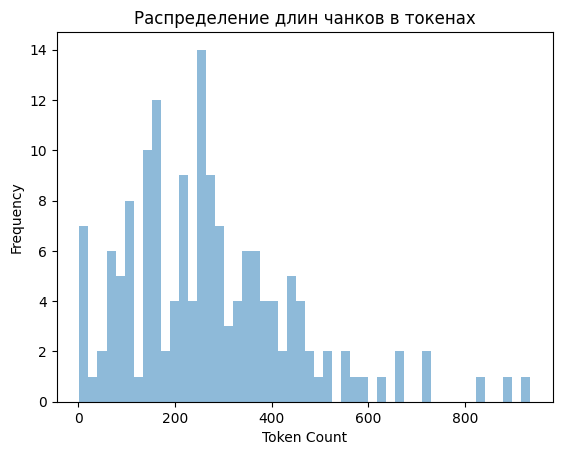

In [ ]:
source_chunks=split_text(database)

In [ ]:
# Инициализирум модель эмбеддингов
embeddings = OpenAIEmbeddings()

# Создадим индексную базу из разделенных фрагментов текста
db = FAISS.from_documents(source_chunks, embeddings)

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>


<title>api.openai.com | 520: Web server is returning an unknown error</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />


</head>
<body>
<div id="cf-wrapper">
    <div id="cf-error-details" class="p-0">
        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-8">
            <h1 class="inline-block sm:block sm:mb-2 font-light text-60 lg:text-4xl text-black-dark leadin

In [ ]:
# Инструкция для GPT, которая будет подаваться в system
system= load_document_text('https://docs.google.com/document/d/1K1bQt7V-dVMIfwTK27-YicWrhgVTz8xmvtCrQLjC_d4')

In [ ]:
system

'\ufeffТы-нейро-консультант в компании POSTOPLAN, автоматизированной платформы маркетинга в соцсетях и мессенджерах. Далее тебе будет представлена следующая информация: саммаризированный предыдущий диалог с пользователем, актуальный вопрос пользователя, документы с информацией для ответа клиенту. Твоя задача - полно и точно ответить на вопрос пользователя по поводу компании POSTOPLAN, их продукте, ценах, тарифах.  Особенно аккуратно отвечай по цифрам - тарифам и  тому, что входит в каждый тариф. В своем ответе основывайся только на представленных тебе документах, не придумывай ничего “от себя”, однако пользователю об этих документах и их номерах не сообщай. \r\nЕсли пользователь представился (назвал свое имя), используй его имя при ответе. \r\nЕсли в кратком обзоре предыдущего диалога фигурирует имя пользователя, обязательно используй его в ответе, обращайся к пользователю по имени.\r\nТебе запрещено здороваться с пользователем'

In [ ]:
def insert_newlines(text: str, max_len: int = 170) -> str:
    """
    Функция разбивает длинный текст на строки определенной максимальной длины.
    """
    words = text.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line + " " + word) > max_len:
            lines.append(current_line)
            current_line = ""
        current_line += " " + word
    lines.append(current_line)
    return "\n".join(lines)

In [ ]:
def answer_index(system, topic, search_index, temp=0, verbose=0) -> str:
    """
    Функция возвращает ответ модели на основе заданной темы.
    """
    # находим наиболее релевантные вопросу пользователя чанки:
    docs = search_index.similarity_search(topic, k=4)
    message_content = re.sub(r'\n{2}', ' ', '\n '.join([f'\nОтрывок документа №{i+1}\n=====================' + doc.page_content + '\n' for i, doc in enumerate(docs)]))

    # если параметр verbose=1, то выводим релевантные чанки
    if verbose:
        print('message_content :\n', message_content)

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": f"Документ с информацией для ответа пользователю: {message_content}\n\nВопрос пользователя: \n{topic}"}
    ]

    completion = openai.ChatCompletion.create(
        model="gpt-4-0613",
        messages=messages,
        temperature=temp
    )

    return insert_newlines(completion.choices[0].message.content)

Делаем функцию, которая будет саммаризировать диалог по мере его накапливания, и данную саммаризацию мы будем подавать модели, которая отвечает на вопрос клиента, чтобы модель учитывала контекст диалога.

In [ ]:
def summarize_questions(dialog):
    """
    Функция возвращает саммаризированный текст диалога.
    """
    messages = [
        {"role": "system", "content": "Ты - нейро-саммаризатор. Твоя задача - саммаризировать диалог, который тебе пришел. Если пользователь назвал свое имя, обязательно отрази его в саммаризированном диалоге"},
        {"role": "user", "content": "Саммаризируй следующий диалог консультанта и пользователя: " + " ".join(dialog)}
    ]

    completion = openai.ChatCompletion.create(
        model="gpt-4-0613",     # используем gpt4 для более точной саммаризации
        messages=messages,
        temperature=0,          # Используем более низкую температуру для более определенной суммаризации
    )

    return completion.choices[0].message.content

In [ ]:
def text_to_speech(text, filename="response.mp3"):
    tts = gTTS(text=text, lang='ru')
    tts.save(filename)
    return filename

In [ ]:
def play_audio(filename):
    display(Audio(filename, autoplay=True))

Далее следует основная функция, объединяющая все предыдущие. В нее мы подаем инструкцию, базу знаний, текущий вопрос клиента из чата, а также историю предыдущего диалога - при наличии.

In [ ]:
def answer_user_question_dialog(system, db, user_question, question_history):
    """
    Функция возвращает ответ на вопрос пользователя.
    """
    summarized_history = ""
    # Если в истории более одного вопроса, применяем суммаризацию
    if len(question_history) > 0:
        summarized_history = "Вот краткий обзор предыдущего диалога: " + summarize_questions([q + ' ' + (a if a else '') for q, a in question_history])

    # Добавляем явное разделение между историей диалога и текущим вопросом
    input_text = summarized_history + "\n\nТекущий вопрос: " + user_question

    # Извлекаем наиболее похожие отрезки текста из базы знаний и получение ответа модели
    answer_text = answer_index(system, input_text, db)

    # Добавляем вопрос пользователя и ответ системы в историю
    question_history.append((user_question, answer_text if answer_text else ''))

    # Выводим саммаризированный текст, который видит модель
    if summarized_history:
        print('****************************')
        print(insert_newlines(summarized_history))
        print('****************************')
    print('Консультант:', answer_text)

    # Преобразование ответа в аудио
    audio_file = text_to_speech(answer_text)

    # Проигрывание аудио в отдельном потоке
    audio_thread = threading.Thread(target=play_audio, args=(audio_file,))
    audio_thread.start()

    return insert_newlines(answer_text)


In [ ]:
def answer_user_question_dialog(system, db, user_question, question_history, output_widget):
    summarized_history = ""
    if len(question_history) > 0:
        summarized_history = "Вот краткий обзор предыдущего диалога: " + summarize_questions([q + ' ' + (a if a else '') for q, a in question_history])
    input_text = summarized_history + "\n\nТекущий вопрос: " + user_question
    answer_text = answer_index(system, input_text, db)
    question_history.append((user_question, answer_text if answer_text else ''))
    if summarized_history:
        output_widget.append_stdout('****************************\n')
        output_widget.append_stdout(insert_newlines(summarized_history) + '\n')
        output_widget.append_stdout('****************************\n')
    output_widget.append_stdout('Консультант: ' + answer_text + '\n')

    audio_file = text_to_speech(answer_text)
    audio_thread = threading.Thread(target=play_audio, args=(audio_file,))
    audio_thread.start()

Следующая функция запускает диалог с клиентом и останавливает его при вводе слова "stop".

In [ ]:
def run_dialog(system_doc_url, knowledge_base_url):
    """
    Функция запускает диалог между пользователем и нейро-консультантом.
    """
    #список кортежей, где каждый кортеж содержит пару вопрос-ответ, для отслеживания истории вопросов и ответов во время сессии диалога.
    question_history = []
    while True:
        user_question = input('Пользователь: ')
        if user_question.lower() == 'stop':
            break
        answer = answer_user_question_dialog(system_doc_url, knowledge_base_url, user_question, question_history)
        print('Консультант:', answer)

    return

In [ ]:
def run_dialog(system_doc_url, knowledge_base_url):
    question_history = []
    output_widget = widgets.Output()
    display(output_widget)

    def on_submit(question):
        user_question = question.value
        question.value = ''
        if user_question.lower() == 'stop':
            return
        with output_widget:
            output_widget.clear_output(wait=True)
            output_widget.append_stdout('Пользователь: ' + user_question + '\n')
            answer_user_question_dialog(system_doc_url, knowledge_base_url, user_question, question_history, output_widget)

    question_box = widgets.Text(placeholder='Введите ваш вопрос...')
    question_box.on_submit(on_submit)
    display(question_box)

In [ ]:
run_dialog(system, db)

Output()

Text(value='', placeholder='Введите ваш вопрос...')